In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Bias Trick

Instead of keep tracking Weight vector and bias vector seperately,we combine both by adding extra dimension to our Train data

Earlier : f (xi;W;b) =Wxi+b

After combining both:

f (xi;W) =Wxi

In [4]:
ONES = np.ones((1,X.shape[0]))
ONES.shape
X = np.vstack((X.T,ONES))

In [5]:
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X.T,Y, test_size=0.33,random_state=5)

In [6]:
X_TRAIN.shape,Y_TRAIN.shape,X_TEST.shape,Y_TEST.shape

((339, 14), (339,), (167, 14), (167,))

I have try various batch size,learning rate and iteration results are shown below

# Batch size (k) = 10,learning rate=0.01,Iteration= 1000

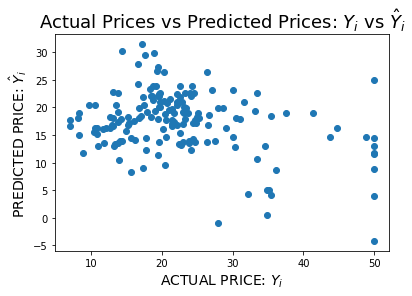

Mean Squared Error between original Price and Predicted Price: 184.65915875462622


In [7]:
k =10
r = 0.01
for i in range(0,1000):
    if i==0:
        INITIAL_WT = np.random.normal(0,1,X_TRAIN.T.shape[0])
    else:
        INITIAL_WT = NEW_WT
    TEMP = np.random.choice(k,k,replace=False)
    BATCH_TRAIN = X_TRAIN.T[:,TEMP]
    BATCH_LABEL = Y_TRAIN.T[TEMP]
    
    INITIAL_WT=np.reshape(INITIAL_WT,(1,14))
    BATCH_LABEL=np.reshape(BATCH_LABEL,(k,1))
   # r = np.random.uniform(0,)
    NEW_WT= np.reshape(INITIAL_WT,(14,1))+r*2*np.dot(BATCH_TRAIN,BATCH_LABEL-np.dot(INITIAL_WT,BATCH_TRAIN).T)
    
PRED_PRICE  = np.dot(NEW_WT.T,X_TEST.T)
plt.scatter(Y_TEST, PRED_PRICE.T)
plt.xlabel("ACTUAL PRICE: $Y_i$",size=14)
plt.ylabel("PREDICTED PRICE: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()
print("Mean Squared Error between original Price and Predicted Price: {}".format(mean_squared_error(Y_TEST, PRED_PRICE.T)))

# Batch size (k) = 20,learning rate=0.001,Iteration= 1000

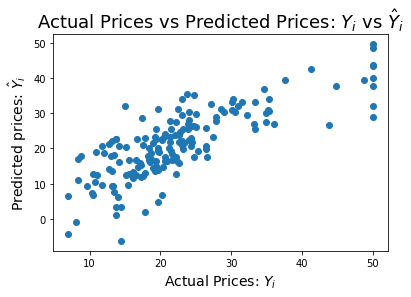

Mean Squared Error between original Price and Predicted Price: 41.50553333942493


In [8]:
k=20
r = 0.001
for i in range(0,1000):
    if i==0:
        INITIAL_WT = np.random.normal(0,1,X_TRAIN.T.shape[0])
    else:
        INITIAL_WT = NEW_WT
    TEMP = np.random.choice(k,k,replace=False)
    BATCH_TRAIN = X_TRAIN.T[:,TEMP]
    BATCH_LABEL = Y_TRAIN.T[TEMP]
    
    INITIAL_WT=np.reshape(INITIAL_WT,(1,14))
    BATCH_LABEL=np.reshape(BATCH_LABEL,(k,1))
    NEW_WT= np.reshape(INITIAL_WT,(14,1))+r*2*np.dot(BATCH_TRAIN,BATCH_LABEL-np.dot(INITIAL_WT,BATCH_TRAIN).T)
    
PRED_PRICE  = np.dot(NEW_WT.T,X_TEST.T)
plt.scatter(Y_TEST, PRED_PRICE.T)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()
print("Mean Squared Error between original Price and Predicted Price: {}".format(mean_squared_error(Y_TEST, PRED_PRICE.T)))

# Batch size (k) = 50,learning rate=0.001,Iteration= 1000

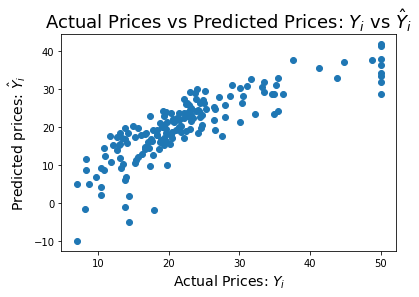

Mean Squared Error between original Price and Predicted Price: 35.21833463505111


In [9]:
k=50
r = 0.0001
for i in range(0,1000):
    if i==0:
        INITIAL_WT = np.random.normal(0,1,X_TRAIN.T.shape[0])
    else:
        INITIAL_WT = NEW_WT
    TEMP = np.random.choice(k,k,replace=False)
    BATCH_TRAIN = X_TRAIN.T[:,TEMP]
    BATCH_LABEL = Y_TRAIN.T[TEMP]
    
    INITIAL_WT=np.reshape(INITIAL_WT,(1,14))
    BATCH_LABEL=np.reshape(BATCH_LABEL,(k,1))
   # r = np.random.uniform(0,)
    NEW_WT= np.reshape(INITIAL_WT,(14,1))+r*2*np.dot(BATCH_TRAIN,BATCH_LABEL-np.dot(INITIAL_WT,BATCH_TRAIN).T)
    
PRED_PRICE  = np.dot(NEW_WT.T,X_TEST.T)
plt.scatter(Y_TEST, PRED_PRICE.T)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()
print("Mean Squared Error between original Price and Predicted Price: {}".format(mean_squared_error(Y_TEST, PRED_PRICE.T)))

# Best Possible Match with Sklearn SGD

# Batch size (k) = 256,learning rate=0.0001,Iteration= 1000

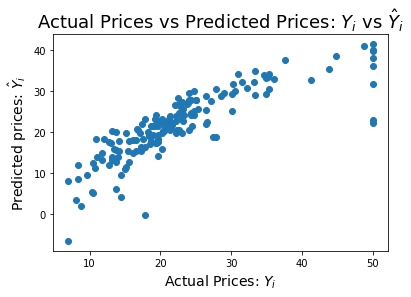

Mean Squared Error between original Price and Predicted Price: 28.811738808796836


In [10]:
k=256
r = 0.0001
for i in range(0,1000):
    if i==0:
        INITIAL_WT = np.random.normal(0,1,X_TRAIN.T.shape[0])
    else:
        INITIAL_WT = NEW_WT
    TEMP = np.random.choice(k,k,replace=False)
    BATCH_TRAIN = X_TRAIN.T[:,TEMP]
    BATCH_LABEL = Y_TRAIN.T[TEMP]
    
    INITIAL_WT=np.reshape(INITIAL_WT,(1,14))
    BATCH_LABEL=np.reshape(BATCH_LABEL,(k,1))
    #r = np.abs(r-0.1)
    #print(r)
    NEW_WT= np.reshape(INITIAL_WT,(14,1))+r*2*np.dot(BATCH_TRAIN,BATCH_LABEL-np.dot(INITIAL_WT,BATCH_TRAIN).T)
    
PRED_PRICE  = np.dot(NEW_WT.T,X_TEST.T)
plt.scatter(Y_TEST, PRED_PRICE.T)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()
print("Mean Squared Error between original Price and Predicted Price: {}".format(mean_squared_error(Y_TEST, PRED_PRICE.T)))

In [11]:
clf = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.001  )
clf.fit(X_TRAIN,Y_TRAIN)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='none',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

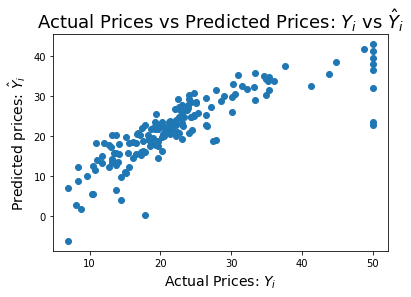

In [12]:
sklearn_sgd_predictions = clf.predict(X_TEST)

# Weights of Sklearn's SGD
sklearn_sgd_weights = clf.coef_ 

plt.scatter(Y_TEST, sklearn_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

In [13]:
print("Mean Squared Error between original Price and Predicted Price: {}".format(mean_squared_error(Y_TEST, sklearn_sgd_predictions)))

Mean Squared Error between original Price and Predicted Price: 28.595009205554724


In [14]:
# Please compare all your models using Prettytable librar
from prettytable import PrettyTable
X=  PrettyTable()
X.field_names=['BATCH_SIZE','LEarning rate','iteration','MSE']
X.add_row(['10','0.01',1000,182.72])
X.add_row(['20','0.001',1000,40.54])
X.add_row(['50','0.0001',1000,35.28])
X.add_row(['256','0.0001',1000,28.81])
print(X)

+------------+---------------+-----------+--------+
| BATCH_SIZE | LEarning rate | iteration |  MSE   |
+------------+---------------+-----------+--------+
|     10     |      0.01     |    1000   | 182.72 |
|     20     |     0.001     |    1000   | 40.54  |
|     50     |     0.0001    |    1000   | 35.28  |
|    256     |     0.0001    |    1000   | 28.81  |
+------------+---------------+-----------+--------+


In [15]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",NEW_WT)
ptable.add_column("Weights of Sklearn's SGD",sklearn_sgd_weights)

# Printing the Table
print(ptable)

+-------+-----------------------+--------------------------+
| S.NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |     [-1.31371408]     |   -1.3559946567145826    |
|   2   |      [0.62620311]     |    0.9163849235564668    |
|   3   |      [0.11089625]     |   -0.17481406329082294   |
|   4   |      [0.14145771]     |   0.20415123773304447    |
|   5   |     [-1.58964632]     |    -1.504797115180171    |
|   6   |      [2.96830079]     |    2.8117657671294505    |
|   7   |     [-0.29638379]     |   -0.3325495415360723    |
|   8   |     [-2.65583322]     |    -2.874832934096315    |
|   9   |      [2.65388321]     |    2.974159162078183     |
|   10  |     [-2.00782439]     |   -2.2799864353361996    |
|   11  |     [-2.03633121]     |    -2.156967968287557    |
|   12  |      [1.09944447]     |    1.1140953399897164    |
|   13  |     [-3.37261155]     |    -3.379866275467237    |
|   14  |     [22.093597

Refrence = https://github.com/PushpendraSinghChauhan/SGD-Linear-Regression/blob/master/Implement%20Stochastic%20Gradient%20Descent%20on%20Linear%20Regression%20.ipynb